In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings

## --- ignorar avisos Pandas --- ##
warnings.filterwarnings('ignore')


# from google.colab import drive
# drive.mount('/content/drive')

link país = https://www.gov.br/produtividade-e-comercio-exterior/pt-br/balanca/bd/tabelas/PAIS.csv/view

link bases - https://www.cnpuv.embrapa.br/vitibrazil/index.php?opcao=opt_02

countries = https://developers.google.com/public-data/docs/canonical/countries_csv

In [44]:

## -- Arquivos base -- ##

# Exportação
exp_vinho = '../data/doc/ExpVinho.csv'
exp_espumante = '../data/doc/ExpEspumantes.csv'
exp_suco = '../data/doc/ExpSuco.csv'
exp_uva = '../data/doc/ExpUva.csv'

# importação
imp_espumante = '../data/doc/ImpEspumantes.csv'
imp_frescas = '../data/doc/ImpFrescas.csv'
imp_passas = '../data/doc/ImpPassas.csv'
imp_suco = '../data/doc/ImpSuco.csv'
imp_vinhos = '../data/doc/ImpVinhos.csv'

# Processamento
processa_americanas = '../data/doc/ProcessaAmericanas.csv'
processa_mesa = '../data/doc/ProcessaMesa.csv'
processa_sem_class = '../data/doc/ProcessaSemclass.csv'
processa_viniferas = '../data/doc/ProcessaViniferas.csv'

# produção
producao = '../data/doc/Producao.csv'

# Comercialização
comercio = '../data/doc/Comercio.csv'

# paises e continentes
pais = '../data/doc/pais.csv'
pais_geral = '../data/doc/info_geral_paises.csv'

# cotacao dolar análise
cotacao = '../data/doc/cotacao_dolar_ano.xlsx'

# demográfico da população
populacao = '../data/doc/WPP2022_Demographic_Indicators_Medium.csv'


## -- Dataframes -- ##

# Exportação
df_exp_vinho = pd.read_csv(exp_vinho, delimiter=';')
df_exp_espumante = pd.read_csv(exp_espumante, delimiter=';')
df_exp_suco = pd.read_csv(exp_suco, delimiter=';')
df_exp_uva = pd.read_csv(exp_uva, delimiter=';')

# importação
df_imp_vinhos = pd.read_csv(imp_vinhos, delimiter=';')
df_imp_espumante = pd.read_csv(imp_espumante, delimiter=';')
df_imp_frescas = pd.read_csv(imp_frescas, delimiter=';')
df_imp_passas = pd.read_csv(imp_passas, delimiter=';')
df_imp_suco = pd.read_csv(imp_suco, delimiter=';')

# Processamento
df_processa_viniferas = pd.read_csv(processa_viniferas, delimiter='\t')
df_processa_americanas = pd.read_csv(processa_americanas, delimiter=';')
df_processa_mesa = pd.read_csv(processa_mesa, delimiter=';')
df_processa_sem_class = pd.read_csv(processa_sem_class, delimiter=';')

# produção
df_producao = pd.read_csv(producao, delimiter=';')

# Comercialização
df_comercio = pd.read_csv(comercio, delimiter=';')

# base país
df_pais = pd.read_csv(pais, delimiter=';', encoding='latin-1')
df_pais_geral = pd.read_csv(pais_geral, delimiter=';', encoding='latin-1')

# df demográfico da população
df_populacao = pd.read_csv(populacao, delimiter=',')

# base cotação dolar
df_cotacao = pd.read_excel(cotacao)

In [45]:
### --- tabela populacao --- ##

filtro_tab = ['Time','ISO3_code', 'TPopulation1Jan', 'MedianAgePop', 'PopDensity', 'PopSexRatio']
df_populacao_filtro = df_populacao[filtro_tab]

# renomeando colunas
df_populacao_filtro.columns = 'ano', 'iso_code', 'populacao', 'idade_mediana', 'densidade_populacional', 'sexo_populacional'

# filtro e tratamento dos dados
df_populacao_geral = df_populacao_filtro[(df_populacao_filtro['iso_code'].notnull()) & (df_populacao_filtro['ano'] < 2023)]
df_populacao_geral

,ano,iso_code,populacao,idade_mediana,densidade_populacional,sexo_populacional
3648,1950,BDI,2229.322,18.3147,86.8637,91.9472
3649,1951,BDI,2278.903,18.0842,88.7571,92.1448
3650,1952,BDI,2327.593,17.8744,90.6179,92.3191
3651,1953,BDI,2375.478,17.6693,92.4508,92.4880
3652,1954,BDI,2422.721,17.4706,94.2874,92.6503
...,...,...,...,...,...,...
43388,2018,WLF,11.870,34.3973,84.3964,93.3006
43389,2019,WLF,11.761,34.9624,83.6714,93.1091
43390,2020,WLF,11.667,35.4533,83.2464,92.9553
43391,2021,WLF,11.642,35.8358,83.0536,92.7476


#### Comercio

In [4]:
df_comercio.columns

Index(['0', 'ANO', 'ANO.1', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021'],
      dtype='object')

In [12]:
df_comercio['ANO.1'].unique()

array(['VINHO DE MESA', '  Tinto', '  Rosado', '  Branco',
       'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
       'VINHO ESPECIAL', 'ESPUMANTES ', '  Espumante  Moscatel',
       '  Espumante', '  Espumante Orgânico', 'SUCO DE UVAS',
       '   Suco Natural Integral', '   Suco Reprocessado/reconstituido',
       '   Suco Orgânico', '   Outros sucos de uvas',
       'SUCO DE UVAS CONCENTRADO', 'OUTROS PRODUTOS COMERCIALIZADOS',
       '  Outros vinhos (sem informação detalhada)',
       '  Agrin (fermentado, acetico misto)',
       '  Aguardente de vinho 50°gl', '  Alcool vinico',
       '  Bagaceira (graspa)', '  Base champenoise champanha',
       '  Base charmat champanha', '  Base espumante moscatel',
       '  Bebida de uva', '  Borra líquida', '  Borra seca',
       '  Brandy (conhaque)', '  Cooler', '  Coquetel com vinho',
       '  Destilado de vinho', '  Filtrado doce', '  Jeropiga',
       '  Mistelas', '  Mosto concentrado', '  Mosto de uva',
       '  Mosto

In [15]:
# df_comercio.loc[df_comercio['ANO'] == 'VINHO DE MESA']
df_comercio.loc[df_comercio['ANO.1'] == '  Tinto']

,0,ANO,ANO.1,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
5,6,vm_Tinto,Tinto,435354,428927,624499,783508,1616144,2050960,4450570,...,15443016,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862
11,12,ve_Tinto,Tinto,4730346,4802828,4347706,5017487,3763509,4815235,4819463,...,239,2257,7231,593,331,0,0,0,0,0


In [ ]:
['VINHO DE MESA', 'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO', 'VINHO ESPECIAL', 'ESPUMANTES ']

In [30]:
df_comercioV1 = df_comercio.drop(columns={'0', 'ANO'})
df_comercioV1 = df_comercioV1.rename(columns={'ANO.1': 'ANO'})
df_comercioV2 = df_comercioV1.set_index('ANO')
# df_comercioV2.groupby('ANO').sum()
df_comercioV2.loc['ANO']

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ANO,,,,,,,,,,,,,,,,,,,,,
VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,...,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,...,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,...,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,...,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vinho base para espumantes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Vinho composto,3386173,3645774,3921573,4168841,3670736,3493104,5429800,5170582,5649977,976174,...,510914,595513,450121,413735,377685,485944,249165,366549,63625,227116
Vinho licoroso,3013056,2475632,2407816,2443944,1921867,2205036,2474364,3027434,3094302,2531379,...,645341,609153,616904,510975,546189,496746,491165,465964,362340,376597


In [ ]:
# https://medium.com/grupo-32/an%C3%A1lise-sobre-a-exporta%C3%A7%C3%A3o-de-vinhos-no-brasil-0d9858104c67#:~:text=Paraguai%2C%20R%C3%BAssia%20e%20Estados%20Unidos,volume%20(L)%20das%20exporta%C3%A7%C3%B5es.

# O Rio Grande do Sul continua sendo o Estado que concentra a maior parte das exportações brasileiras, com 92,5% do valor total, seguido por São Paulo e Paraná. Os espumantes continuam mostrando seu potencial e oportunidade de crescimento nos Estados Unidos, destino de 87% das exportações dessa categoria e que registrou crescimento de 57% em volume e 53% em valor. Já os vinhos tranquilos continuam tendo o Paraguai como principal destino, com 79% das exportações.


# Crescimento do Mercado de Vinhos: O setor vitivinícola brasileiro, que inclui o Paraguai como um dos principais destinos de exportação, tem registrado crescimento significativo. Em 2019, por exemplo, houve um aumento de 66,75% em valor nas exportações de vinhos e espumantes brasileiros em comparação com o ano anterior.


#### Total Vinho

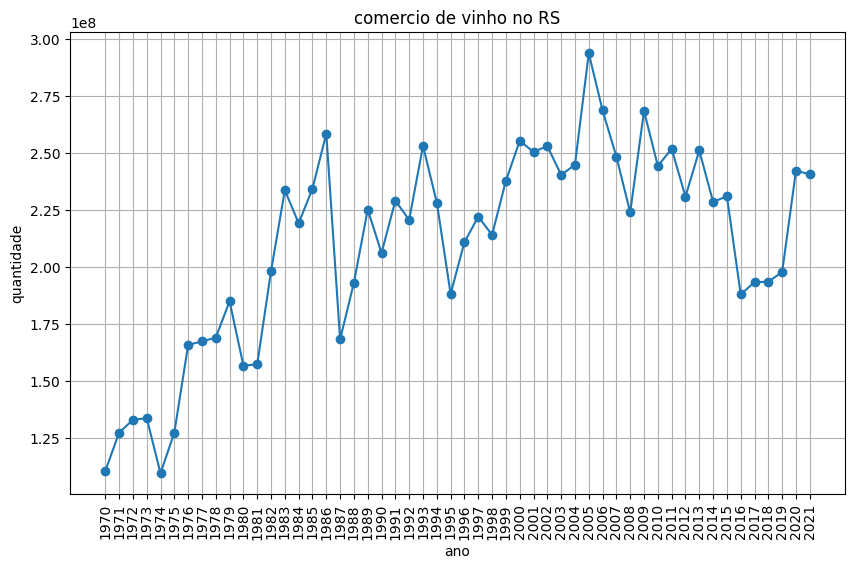

In [128]:

df_comercio_vinho = df_comercio.drop([df_comercio.columns[0], df_comercio.columns[2]], axis=1)
df_comercio_vinho.set_index('ANO', inplace=True)

df_comercio_vinho_grafico = df_comercio_vinho.transpose()
df_comercio_vinho_grafico = df_comercio_vinho_grafico.iloc[:, :15]

df_comercio_vinho_grafico['Total Vinho'] = (df_comercio_vinho_grafico['VINHO  FINO DE MESA'] +
                                            df_comercio_vinho_grafico['VINHO DE MESA'] + 
                                            df_comercio_vinho_grafico['VINHO ESPECIAL'] + 
                                            df_comercio_vinho_grafico['VINHO FRIZANTE'] + 
                                            df_comercio_vinho_grafico['VINHO ORGÂNICO'])

plt.figure(figsize=(10, 6))
plt.plot(df_comercio_vinho_grafico.index, df_comercio_vinho_grafico['Total Vinho'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('comercio de vinho no RS')
plt.xlabel('ano')
plt.ylabel('quantidade')
plt.show()

#### Tabela Exp_vinho

In [46]:
df_exp_vinho_qtde = df_exp_vinho.drop(columns={'Id'})

# Filtrar colunas de quantidade e valor
colunas_qtde = [col for col in df_exp_vinho_qtde.columns if not col.endswith('.1')]
colunas_valor = [col for col in df_exp_vinho_qtde.columns if col.endswith('.1')]

# Assegurar que 'País' não seja incluído nas somas
colunas_qtde.remove('País')

# Calcular a soma das quantidades e valores
df_exp_vinho_qtde['qtde_total'] = df_exp_vinho_qtde[colunas_qtde].sum(axis=1)
df_exp_vinho_qtde['valor_total'] = df_exp_vinho_qtde[colunas_valor].sum(axis=1)

df_exp_vinho_qtde.head()


,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,...,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,qtde_total,valor_total
0,Afeganistão,0,0,0,0,0,0,0,0,0,...,0,0,0,0,11,46,0,0,11,46
1,África do Sul,0,0,0,0,0,0,0,0,0,...,26,95,4,21,0,0,0,0,493,1789
2,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,...,3660,25467,6261,32605,2698,6741,7630,45367,1206001,3121585
3,Angola,0,0,0,0,0,0,0,0,0,...,345,1065,0,0,0,0,4068,4761,5819857,4859836
4,Anguilla,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,454,186


In [47]:
df_exp_vinho_qtde[['País', 'valor_total']].sort_values(by='valor_total', ascending=False).head(10)

,País,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [35]:
df_exp_vinho_qtde[['País', 'qtde_total','valor_total']].sort_values(by=['qtde_total','valor_total'], ascending=False)

,País,qtde_total,valor_total
97,Paraguai,115543747,85606168
48,Estados Unidos,55258958,71504688
105,Rússia,39808014,25914397
75,Japão,8198936,7043882
3,Angola,5819857,4859836
...,...,...,...
111,Suazilândia,10,24
84,Mauritânia,9,85
33,Comores,9,25
69,Indonésia,5,6


In [ ]:
# plt.figure(figsize=(20, 9))
# plt.plot(df_exp_vinho_qtde['País'], df_exp_vinho_qtde['qtde_total'], marker='o')
# plt.xticks(rotation=90)
# plt.grid(True)
# plt.title('exportacao vinho pais x quantidade')
# plt.xlabel('pais')
# plt.ylabel('qtde')
# plt.show()

In [49]:
########## Tabela destino e Origem #################

# Lista de colunas que não são 'País', 'qtde_total' ou 'valor_total'
colunas_anos = [col for col in df_exp_vinho_qtde.columns if col not in ['País', 'qtde_total', 'valor_total']]

# print(colunas_anos)

# Aplicando o melt
df_melted = df_exp_vinho_qtde.melt(id_vars='País', value_vars=colunas_anos, var_name='Ano', value_name='Valor')
# df_melted

# # Separando 'Ano' em 'Ano' e 'Tipo'
df_melted['Tipo'] = df_melted['Ano'].str.endswith('.1')

# # Pivotando o DataFrame para ter colunas separadas para quantidade e valor total
df_pivot = df_melted.pivot_table(index=['País', 'Ano'], columns='Tipo', values='Valor').reset_index()

df_pivot.fillna(0.0, inplace=True)

df_pivot['Ano'] = df_pivot['Ano'].astype(str).str.replace(r'\.1$', '', regex=True)
# # Renomeando as colunas
df_pivot.columns = ['País', 'Ano', 'Litros', 'Valor']

# # Exibindo o DataFrame resultante
df_pivot['Origem'] = 'Brasíl'

filtro = ['Origem', 'País', 'Ano', 'Litros', 'Valor']

df_filtrado = df_pivot[filtro]

df_filtrado.columns = ['Origem', 'Destino', 'Ano', 'Litros', 'Valor']

df_filtrado

,Origem,Destino,Ano,Litros,Valor
0,Brasíl,Afeganistão,1970,0.0,0.0
1,Brasíl,Afeganistão,1970,0.0,0.0
2,Brasíl,Afeganistão,1971,0.0,0.0
3,Brasíl,Afeganistão,1971,0.0,0.0
4,Brasíl,Afeganistão,1972,0.0,0.0
...,...,...,...,...,...
13563,Brasíl,Áustria,2020,0.0,0.0
13564,Brasíl,Áustria,2021,0.0,0.0
13565,Brasíl,Áustria,2021,0.0,0.0
13566,Brasíl,Áustria,2022,6.0,0.0


In [93]:
df_pivot.columns

Index(['País', 'Ano', 'Quantidade', 'Valor Total', 'Origem'], dtype='object')

In [91]:
df_pivot[df_pivot['País'] == 'Paraguai']['Valor Total'].sum()

85606168.0

In [86]:
# teste['Ano'] = teste['Ano'].str.replace('.1', '')
# teste[(teste['País'] == 'Paraguai')][True].sum()

# Removendo '.1' do final dos anos
# teste['Ano'] = teste['Ano'].astype(str).str.replace('.1', '')


# Removendo '.1' somente se estiver no final dos anos


Tipo,País,Ano,False,True
0,Afeganistão,1970,0.0,0.0
1,Afeganistão,1970,0.0,0.0
2,Afeganistão,1971,0.0,0.0
3,Afeganistão,1971,0.0,0.0
4,Afeganistão,1972,0.0,0.0
...,...,...,...,...
13563,Áustria,2020,0.0,0.0
13564,Áustria,2021,0.0,0.0
13565,Áustria,2021,0.0,0.0
13566,Áustria,2022,6.0,0.0


In [87]:
# teste[(teste['País'] == 'Paraguai')][True].sum()

85606168.0

In [48]:
df_melted[(df_melted['País'] == 'Paraguai') & (df_melted['Ano'].isin(colunas_qtde)) ]['Valor'].sum()

115543747

In [55]:
df_melted[(df_melted['País'] == 'Paraguai') & (df_melted['Tipo'] == True)]['Valor'].sum()

85606168

#### Tabela exportação

In [51]:

# Função para classificar com base no índice
def classificar(index):
    if str(index).endswith('.1'):
        return 'valor'
    else:
        return 'quantidade'
    

In [52]:
df_exp_vinho_tab = df_exp_vinho_qtde
# filtro das colunas sem total 
df_exp_vinho_tab = df_exp_vinho_tab.iloc[:, :-2]
# renomeis o índice para Ano
df_exp_vinho_tab = df_exp_vinho_tab.rename(columns={'País':'Ano'})
# seta o índice para o ano
df_exp_vinho_tab = df_exp_vinho_tab.set_index('Ano')
# faz o transpose da tabela
df_exp_vinho_tab = df_exp_vinho_tab.T

# criação da coluna 'total_geral'
df_exp_vinho_tab['total_geral'] = df_exp_vinho_tab.sum(axis=1)
# cria uma classificação para 'quantidade' e para 'valor'
df_exp_vinho_tab['classe'] = df_exp_vinho_tab.index.map(classificar)
# alteração do índice do tipo string retirando o '.1'
df_exp_vinho_tab.index = df_exp_vinho_tab.index.map(lambda x: x.replace('.1', ''))
df_exp_vinho_tab

Ano,Afeganistão,África do Sul,"Alemanha, República Democrática",Angola,Anguilla,Antígua e Barbuda,Antilhas Holandesas,Argentina,Aruba,Austrália,...,Trinidade Tobago,Tunísia,Turquia,Tuvalu,Uruguai,Vanuatu,Venezuela,Vietnã,total_geral,classe
1970,0,0,0,0,0,0,280,0,0,0,...,0,0,0,0,0,0,0,0,136009,quantidade
1970,0,0,0,0,0,0,207,0,0,0,...,0,0,0,0,0,0,0,0,40500,valor
1971,0,0,0,0,0,0,4800,0,0,0,...,0,0,0,0,0,0,3200,0,281305,quantidade
1971,0,0,0,0,0,0,3705,0,0,0,...,0,0,0,0,0,0,2000,0,83465,valor
1972,0,0,4168,0,0,0,3000,0,0,0,...,0,0,0,0,0,0,1350,0,381020,quantidade
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,0,21,32605,0,0,1864,0,4176,0,3413,...,0,0,0,4,0,31,9808,584,6078288,valor
2021,11,0,2698,0,0,805,0,6,0,705,...,0,0,343,0,136774,0,26415,0,8058704,quantidade
2021,46,0,6741,0,0,2268,0,13,0,4034,...,0,0,878,0,149842,0,35944,0,9851942,valor
2022,0,0,7630,4068,0,419,0,480,0,1424,...,0,0,418,0,637117,0,23220,130,7025983,quantidade


In [22]:
df_exp_total_por_ano = df_exp_vinho_tab[df_exp_vinho_tab['classe'] == 'valor'][['total_geral']].astype(int)
df_exp_total_por_ano.head()

Ano,total_geral
1970,40500
1971,83465
1972,121097
1973,174792
1974,185871


In [23]:
df_pais_valor = df_exp_vinho_tab[df_exp_vinho_tab['classe'] == 'valor']
df_pais_valor = df_pais_valor.drop(columns={'total_geral','classe'})
df_pais_valor = df_pais_valor.T
df_pais_valor['valor_total'] = df_pais_valor.sum(axis=1)
df_pais_valortotal = df_pais_valor[['valor_total']]
df_pais_valortotal.reset_index(inplace=True)
df_pais_valortotal = df_pais_valortotal.rename(columns={'Ano':'pais'})
df_pais_valortotal.head()

,pais,valor_total
0,Afeganistão,46
1,África do Sul,1789
2,"Alemanha, República Democrática",3121585
3,Angola,4859836
4,Anguilla,186


#### df_pais

In [53]:
df_pais_geral.columns = ['pais', 'iso_code', 'pais_ing', 'continent', 'cod_iso3']
filtro_paisgeral = ['pais', 'continent']
df_pais_geralv1 = df_pais_geral[filtro_paisgeral]
df_pais_geralv1

,pais,continent
0,Angola,África
1,Cabo Verde,África
2,Camarões,África
3,Comores,África
4,Congo,África
...,...,...
275,A Designar,Sem informação
276,Bancos Centrais,Sem informação
277,Organizações Internacionais,Sem informação
278,Sem informação,Sem informação


In [54]:
df_pais

,CO_PAIS,CO_PAIS_ISON3,CO_PAIS_ISOA3,NO_PAIS,NO_PAIS_ING,NO_PAIS_ESP
0,0,898,ZZZ,Não Definido,Not defined,No definido
1,13,4,AFG,Afeganistão,Afghanistan,Afganistan
2,15,248,ALA,"Aland, Ilhas",Aland Islands,"Alans, Islas"
3,17,8,ALB,Albânia,Albania,Albania
4,20,724,ESP,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands","Alboran-Perejil, Islas"
...,...,...,...,...,...,...
276,994,898,ZZZ,A Designar,To define,A designar
277,995,898,ZZZ,Bancos Centrais,Central Banks,Bancos Centrales
278,997,898,ZZZ,Organizações Internacionais,International Organizations,Organizaciones Internacionales
279,998,898,ZZZ,Sem informação,Sem informação,Sem informação


In [55]:
# df_pais_valortotal

filtro_pais = ['NO_PAIS', 'NO_PAIS_ING', 'CO_PAIS_ISOA3']

df_pais = df_pais[filtro_pais]

df_pais = df_pais.rename(columns={'NO_PAIS':'pais', 'NO_PAIS_ING':'pais_ing', 'CO_PAIS_ISOA3':'iso_code'})

df_pais_continet = pd.merge(df_pais, df_pais_geralv1, how='left', on='pais')

df_pais_continet

,pais,pais_ing,iso_code,continent
0,Não Definido,Not defined,ZZZ,NaN
1,Afeganistão,Afghanistan,AFG,Ásia
2,"Aland, Ilhas",Aland Islands,ALA,Europa
3,Albânia,Albania,ALB,Europa
4,"Alboran-Perejil, Ilhas","Alboran-Perejil, Islands",ESP,Europa
...,...,...,...,...
276,A Designar,To define,ZZZ,Sem informação
277,Bancos Centrais,Central Banks,ZZZ,Sem informação
278,Organizações Internacionais,International Organizations,ZZZ,Sem informação
279,Sem informação,Sem informação,ZZZ,Sem informação


In [56]:
df_pais_continet.fillna('Não Definido', inplace=True)
df_pais_continet[df_pais_continet.isnull().any(axis=1)]

,pais,pais_ing,iso_code,continent


Index(['ano', 'iso_code', 'populacao', 'idade_mediana',
       'densidade_populacional', 'sexo_populacional'],
      dtype='object')

In [60]:

df_pais_continet.columns = ['Destino', 'pais_ing', 'iso_code', 'continent']

df_exporta_paisv1 = pd.merge(df_filtrado, df_pais_continet, how='left', on='Destino')
df_exporta_paisv1

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent
0,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia
1,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia
2,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia
3,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia
4,Brasíl,Afeganistão,1972,0.0,0.0,Afghanistan,AFG,Ásia
...,...,...,...,...,...,...,...,...
13563,Brasíl,Áustria,2020,0.0,0.0,Austria,AUT,Europa
13564,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa
13565,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa
13566,Brasíl,Áustria,2022,6.0,0.0,Austria,AUT,Europa


In [68]:
df_exporta_paisv1['Ano'] = df_exporta_paisv1['Ano'].astype('int64')
df_exporta_paisv1.dtypes

Origem        object
Destino       object
Ano            int64
Litros       float64
Valor        float64
pais_ing      object
iso_code      object
continent     object
dtype: object

In [69]:
df_populacao_geral.columns = ['Ano', 
                              'iso_code',
                                'populacao', 
                                'idade_mediana', 
                                'densidade_populacional', 
                                'sexo_populacional']

# df_populacao_geral.dtypes

df_exporta_paisv2 = pd.merge(df_exporta_paisv1, df_populacao_geral, how='left', on=['Ano', 'iso_code'])
df_exporta_paisv2

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent,populacao,idade_mediana,densidade_populacional,sexo_populacional
0,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263
1,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263
2,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321
3,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321
4,Brasíl,Afeganistão,1972,0.0,0.0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494
...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Brasíl,Áustria,2020,0.0,0.0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602
13564,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132
13565,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132
13566,Brasíl,Áustria,2022,6.0,0.0,Austria,AUT,Europa,8929.716,42.9347,108.3340,96.9768


In [70]:
df_exporta_paisv2['Litros_por_populacao'] = df_exporta_paisv2['Litros'] / df_exporta_paisv2['populacao']
df_exporta_paisv2['Preco_por_litro'] = df_exporta_paisv2['Valor'] / df_exporta_paisv2['Litros']
df_exporta_paisv2

,Origem,Destino,Ano,Litros,Valor,pais_ing,iso_code,continent,populacao,idade_mediana,densidade_populacional,sexo_populacional,Litros_por_populacao,Preco_por_litro
0,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,NaN
1,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,NaN
2,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,NaN
3,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,NaN
4,Brasíl,Afeganistão,1972,0.0,0.0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Brasíl,Áustria,2020,0.0,0.0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602,0.000000,NaN
13564,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,NaN
13565,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,NaN
13566,Brasíl,Áustria,2022,6.0,0.0,Austria,AUT,Europa,8929.716,42.9347,108.3340,96.9768,0.000672,0.0


In [72]:
df_exporta_paisv2.columns = ['Origem', 'Destino', 'Ano', 'Litros', 'Valor', 'Pais_Ing', 'ISO_code',
                             'Continente', 'Populacao', 'Idade_media', 'Densidade_populacional',
                             'Sexo_populacional', 'Litros_por_populacao', 'Preco_por_litro']

df_exporta_paisv2

,Origem,Destino,Ano,Litros,Valor,Pais_Ing,ISO_code,Continente,Populacao,Idade_media,Densidade_populacional,Sexo_populacional,Litros_por_populacao,Preco_por_litro
0,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,NaN
1,Brasíl,Afeganistão,1970,0.0,0.0,Afghanistan,AFG,Ásia,10620.384,17.0983,16.5610,105.2263,0.000000,NaN
2,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,NaN
3,Brasíl,Afeganistão,1971,0.0,0.0,Afghanistan,AFG,Ásia,10885.559,16.9484,16.9658,105.0321,0.000000,NaN
4,Brasíl,Afeganistão,1972,0.0,0.0,Afghanistan,AFG,Ásia,11146.155,16.8060,17.3831,104.8494,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13563,Brasíl,Áustria,2020,0.0,0.0,Austria,AUT,Europa,8901.106,42.5854,107.9482,96.8602,0.000000,NaN
13564,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,NaN
13565,Brasíl,Áustria,2021,0.0,0.0,Austria,AUT,Europa,8914.448,42.7534,108.1215,96.9132,0.000000,NaN
13566,Brasíl,Áustria,2022,6.0,0.0,Austria,AUT,Europa,8929.716,42.9347,108.3340,96.9768,0.000672,0.0


In [76]:
df_exporta_paisv2[df_exporta_paisv2['Destino'] == 'Paraguai']['Valor'].sum()

85606168.0

#### df_pais_valortotal_nomes

In [ ]:
df_pais_valortotal_nomes = pd.merge(df_pais_valortotal, df_pais_continet, how='left', on='pais')

filtro_paistotal = ['pais_ing', 'pais', 'valor_total']

# filtro_paistotal = ['pais_ing', 'pais','valor_total', 'norm', 'cor']
df_pais_valortotal_nomes = df_pais_valortotal_nomes[filtro_paistotal]
df_pais_valortotal_nomes


In [33]:
df_valor10paise = df_pais_valortotal_nomes[['pais', 'valor_total']].sort_values(by='valor_total', ascending=False).head(10)
df_valor10paise

,pais,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [38]:
brasil_total = df_pais_valortotal_nomes[df_pais_valortotal_nomes['pais'] == 'Brasil'][['pais', 'valor_total']]
# brasil_total

df_valor10paiseBr = pd.concat([df_valor10paise, brasil_total], axis=0) 
df_valor10paiseBr

,pais,valor_total
97,Paraguai,85606168
48,Estados Unidos,71504688
105,Rússia,25914397
103,Reino Unido,8317001
75,Japão,7043882
3,Angola,4859836
28,China,4778033
95,Países Baixos,4287747
47,Espanha,3867723
2,"Alemanha, República Democrática",3121585


In [ ]:
# import streamlit as st
# import pandas as pd
# import pydeck as pdk

# # Suponha que você tenha um DataFrame 'df' com as colunas 'País', 'Latitude' e 'Longitude'
# # df = pd.read_csv('seu_arquivo.csv')

# # Lista de países para o seletor
# lista_paises = ['Brasil', 'Estados Unidos', 'Canadá', 'Alemanha', 'França']  # Complete com sua lista de países

# # Função para filtrar o DataFrame com base no país selecionado
# def filtrar_pais(df, pais):
#     return df[df['País'] == pais]

# # Inicializar o aplicativo Streamlit
# st.title('Mapa de Países')

# # Selecionar o país
# pais_selecionado = st.selectbox('Escolha um país', lista_paises)

# # Filtrar os dados
# df_filtrado = filtrar_pais(df_pais_valortotal, pais_selecionado)

# # Definir a configuração do mapa
# view_state = pdk.ViewState(latitude=df_filtrado['Latitude'].mean(),
#                            longitude=df_filtrado['Longitude'].mean(),
#                            zoom=5)

# # Criar o mapa
# mapa = pdk.Deck(
#     layers=[pdk.Layer(
#         'ScatterplotLayer',
#         data=df_filtrado,
#         get_position='[Longitude, Latitude]',
#         get_color='[200, 30, 0, 160]',
#         get_radius=20000,
#     )],
#     initial_view_state=view_state,
# )

# # Mostrar o mapa
# st.pydeck_chart(mapa)


In [135]:
df_pais_valortotal_nomes

,pais_ing,pais,valor_total
0,Afghanistan,Afeganistão,46
1,South Africa,África do Sul,1789
2,NaN,"Alemanha, República Democrática",3121585
3,Angola,Angola,4859836
4,Anguilla,Anguilla,186
...,...,...,...
123,Tuvalu,Tuvalu,4
124,Uruguay,Uruguai,1453190
125,Vanuatu,Vanuatu,31
126,Venezuela,Venezuela,133144


In [137]:
import plotly.express as px


# Normalizando os valores para o intervalo [0, 1]
df_pais_valortotal_nomes['norm'] = (df_pais_valortotal_nomes['valor_total'] - 
                              df_pais_valortotal_nomes['valor_total'].min()) / (df_pais_valortotal_nomes['valor_total'].max() - 
                                                                         df_pais_valortotal_nomes['valor_total'].min())

# Criando o gráfico de mapa com uma escala de cores contínua
fig = px.choropleth(
    df_pais_valortotal_nomes,
    locations='pais_ing',  # Esta coluna deve conter nomes de países reconhecíveis por Plotly
    locationmode='country names',
    color='norm',  # Use a coluna normalizada para o mapeamento de cores
    hover_name='pais',
    hover_data=['valor_total'],
    color_continuous_scale=['green', 'yellow', 'red']  # Define a escala de cor do verde para vermelho
)

# Mostrar o gráfico
fig.show()


#### Paraguai

In [9]:
df_paraquai_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Paraguai']]
df_paraquai_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Paraguai']]

In [79]:
df_exp_vinho_paraguai_qtde = df_exp_vinho_qtde.loc[df_exp_vinho_qtde['País'] == 'Paraguai', :]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.iloc[:, :-2]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.set_index('País')
colunas_qtde = [col for col in df_exp_vinho_paraguai_qtde.columns if not col.endswith('.1')]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde[colunas_qtde]
df_exp_vinho_paraguai_qtde = df_exp_vinho_paraguai_qtde.T
df_exp_vinho_paraguai_qtde.head()

País,Paraguai
1970,89846
1971,237805
1972,291625
1973,332433
1974,243294


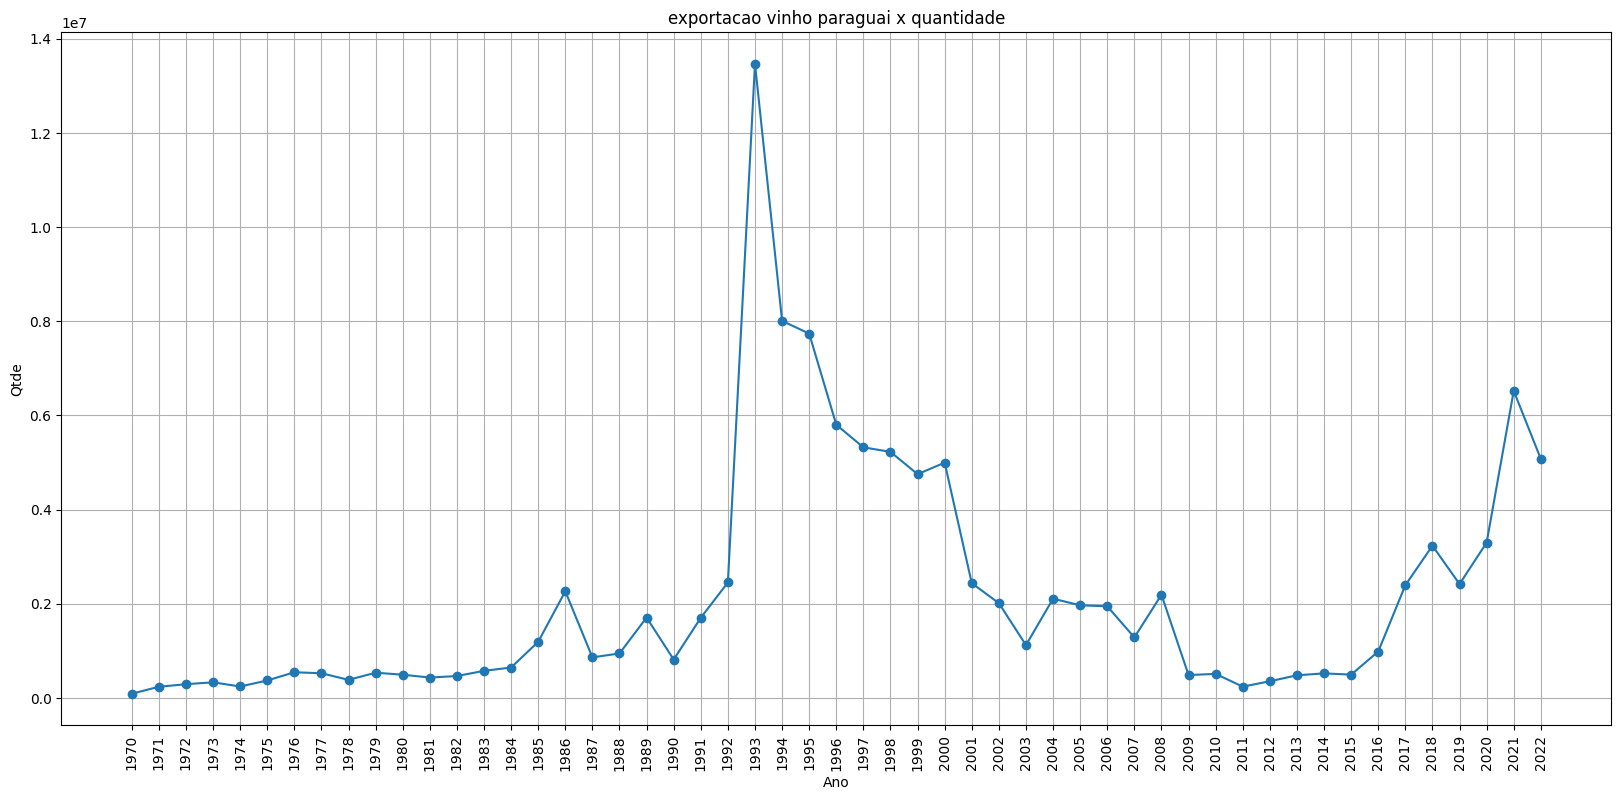

In [10]:
plt.figure(figsize=(20, 9))
plt.plot(df_paraquai_qtd.index, df_paraquai_qtd['Paraguai'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho paraguai x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

In [77]:
df_exp_vinho_paraguai_valor = df_exp_vinho_qtde.loc[df_exp_vinho_qtde['País'] == 'Paraguai', :]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.iloc[:, :-2]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.set_index('País')
colunas_valor = [col for col in df_exp_vinho_qtde.columns if col.endswith('.1')]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor[colunas_valor]
df_exp_vinho_paraguai_valor = df_exp_vinho_paraguai_valor.T
df_exp_vinho_paraguai_valor.head()

País,Paraguai
1970.1,23980
1971.1,64075
1972.1,84402
1973.1,115041
1974.1,119429


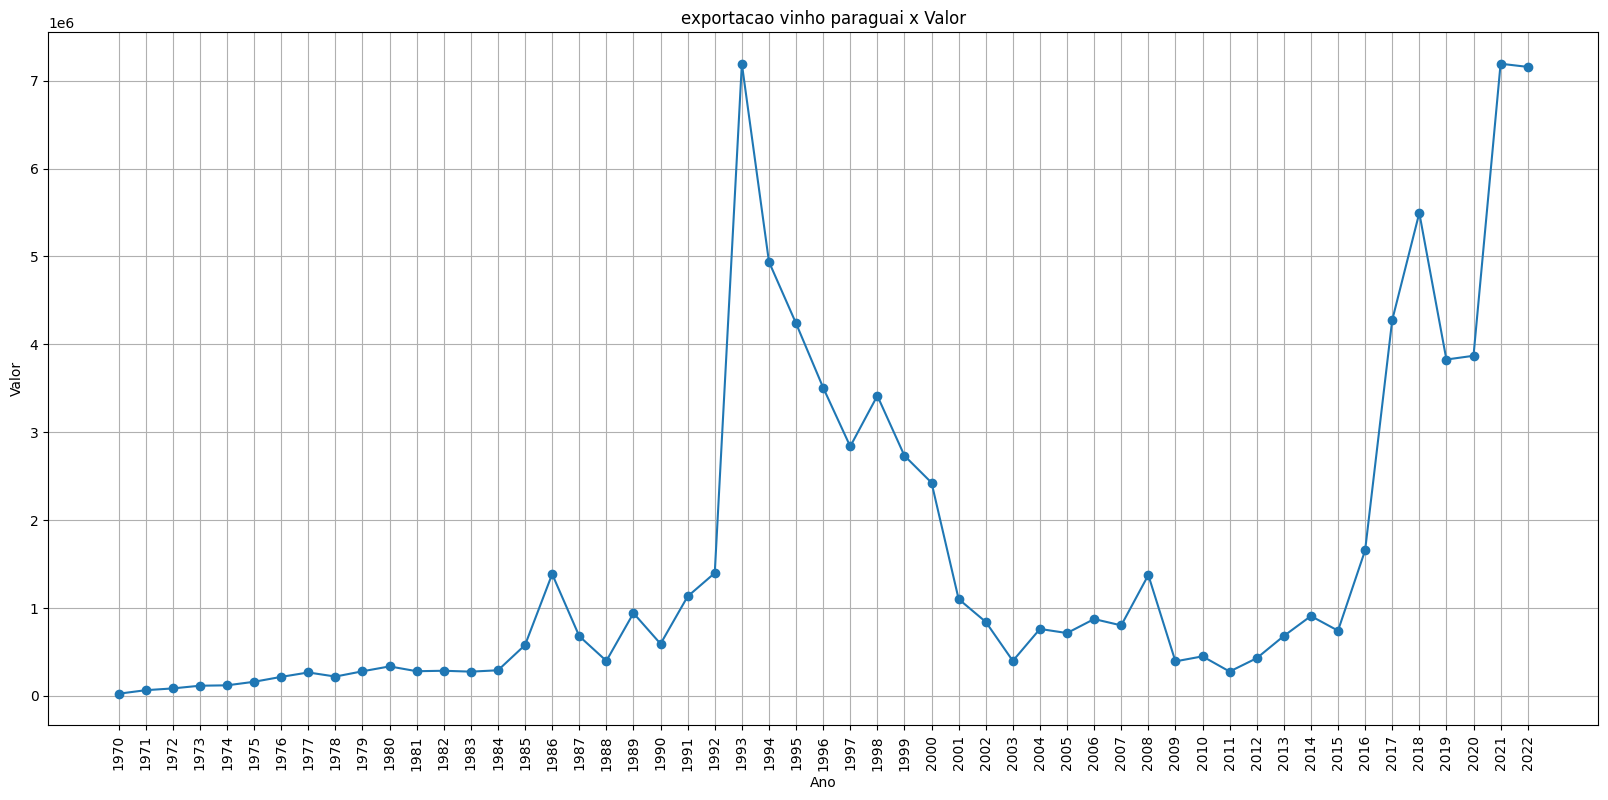

In [11]:
plt.figure(figsize=(20, 9))
plt.plot(df_paraquai_valor.index, df_paraquai_valor['Paraguai'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho paraguai x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

C:\Users\leandro.alves\AppData\Local\Temp\ipykernel_4792\3838194382.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


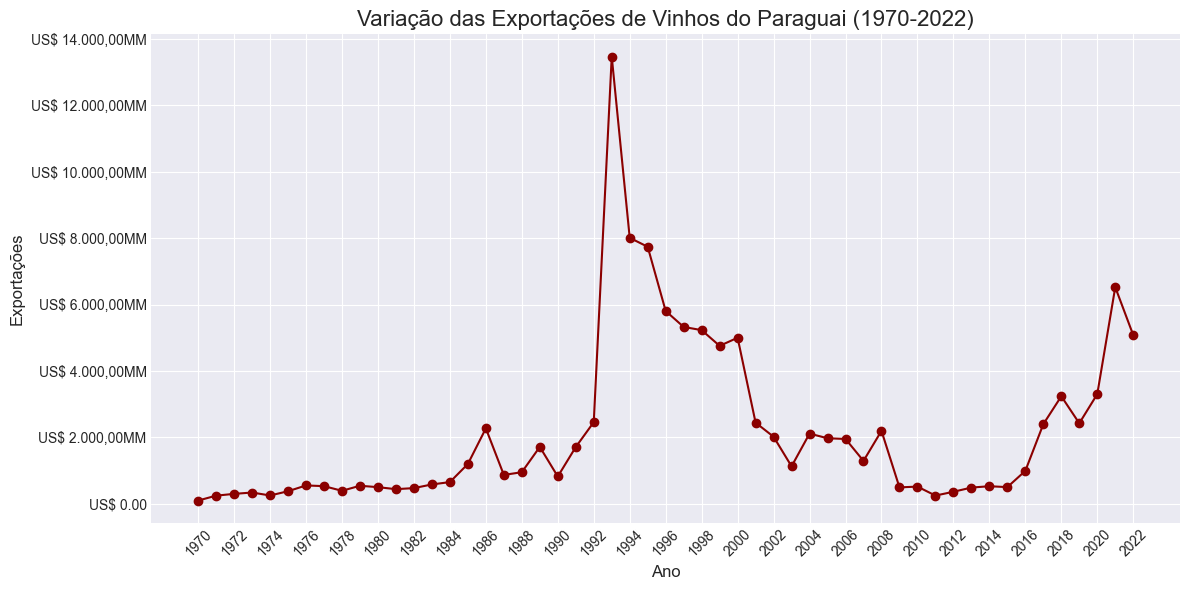

In [19]:
# Configurando o estilo do gráfico
# plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-darkgrid')

# Convertendo os índices para inteiros
df_paraquai_qtd.index = df_paraquai_qtd.index.map(int)

def formatar_como_moeda(valor, divisor_casas=1):
    # Ajuste da formatação de moeda
    valor_formatado = valor / divisor_casas
    if valor_formatado >= 1000:
        valor_formatado = valor_formatado / 1000  # Convertendo para bilhões ou milhões
        return f'US$ {valor_formatado:,.2f}{"B" if valor >= 1000000000 else "MM"}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    else:
        return f'US$ {valor_formatado:,.2f}'

# Criando o gráfico novamente com a formatação personalizada no eixo Y
plt.figure(figsize=(12, 6))
plt.plot(df_paraquai_qtd.index, df_paraquai_qtd['Paraguai'], color='darkred', marker='o')

plt.title('Variação das Exportações de Vinhos do Paraguai (1970-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Exportações', fontsize=12)

plt.xticks(range(df_paraquai_qtd.index.min(), df_paraquai_qtd.index.max()+1, 2), rotation=45)

# Aplicando a função de formatação ao eixo Y
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: formatar_como_moeda(x)))

plt.grid(True)
plt.tight_layout()
plt.show()


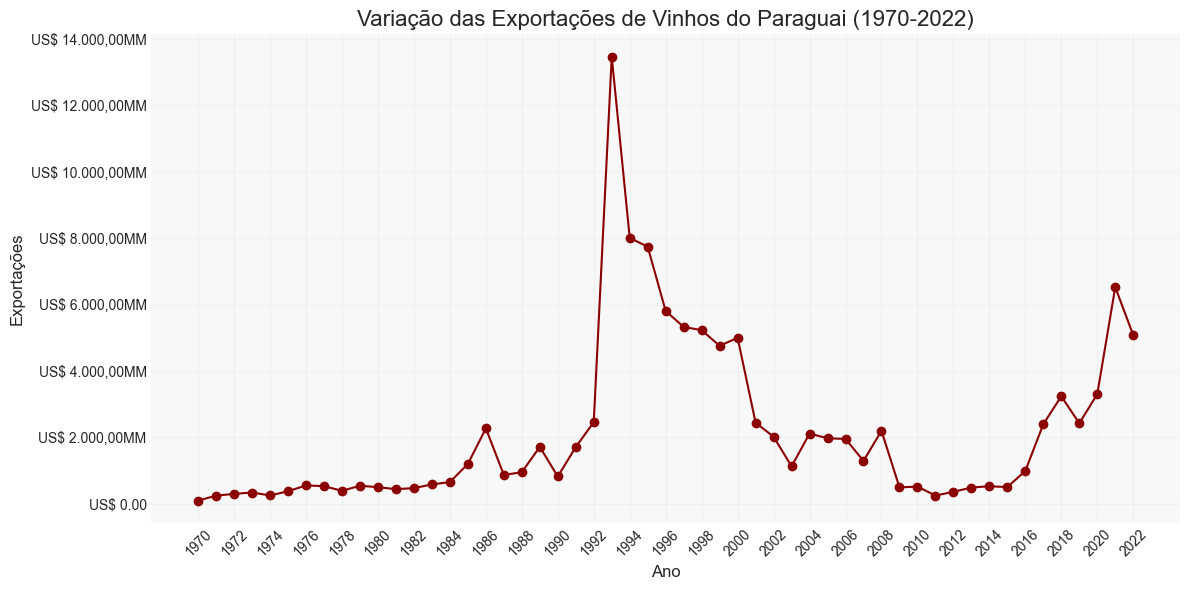

In [20]:

# Convertendo os índices para inteiros
df_paraquai_qtd.index = df_paraquai_qtd.index.map(int)

def formatar_como_moeda(valor, divisor_casas=1):
    # Ajuste da formatação de moeda
    valor_formatado = valor / divisor_casas
    if valor_formatado >= 1000:
        valor_formatado = valor_formatado / 1000  # Convertendo para bilhões ou milhões
        return f'US$ {valor_formatado:,.2f}{"B" if valor >= 1000000000 else "MM"}'.replace(',', 'X').replace('.', ',').replace('X', '.')
    else:
        return f'US$ {valor_formatado:,.2f}'


# Criando o gráfico novamente com a cor de fundo do grid alterada
plt.figure(figsize=(12, 6))
plt.plot(df_paraquai_qtd.index, df_paraquai_qtd['Paraguai'], color='darkred', marker='o')

plt.title('Variação das Exportações de Vinhos do Paraguai (1970-2022)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Exportações', fontsize=12)

plt.xticks(range(df_paraquai_qtd.index.min(), df_paraquai_qtd.index.max()+1, 2), rotation=45)

# Aplicando a função de formatação ao eixo Y
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: formatar_como_moeda(x)))

# Alterando a cor de fundo do grid
plt.grid(True, color='#f0f0f0')

# Alterando a cor de fundo do espaço do gráfico
plt.gca().set_facecolor('#f8f8f8')

plt.tight_layout()
plt.show()



#### Estados Unidos

In [29]:
df_usa_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Estados Unidos']]

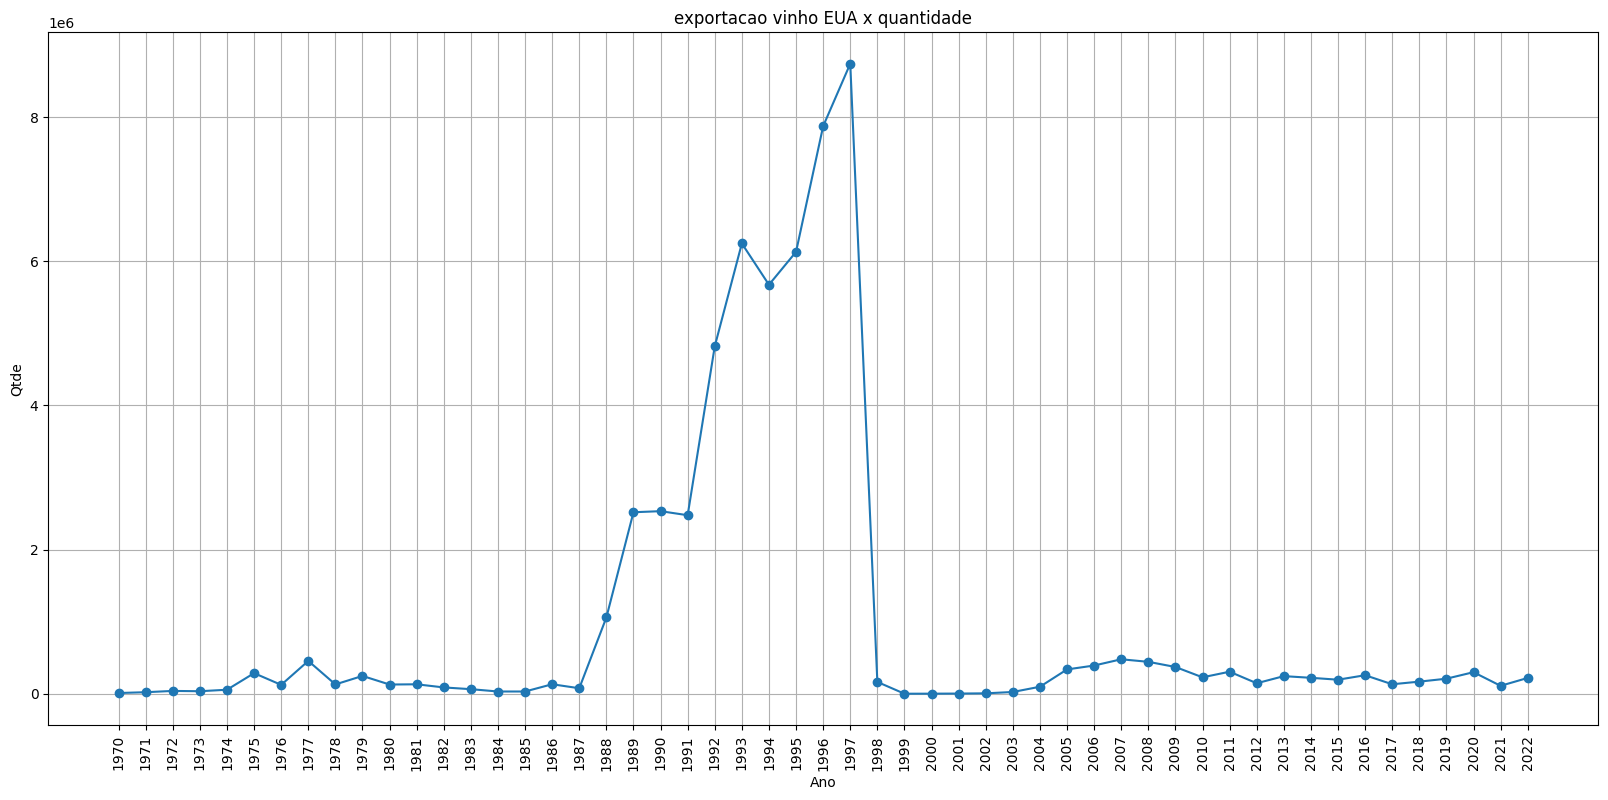

In [30]:
plt.figure(figsize=(20, 9))
plt.plot(df_usa_qtd.index, df_usa_qtd['Estados Unidos'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho EUA x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

In [31]:
df_usa_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Estados Unidos']]

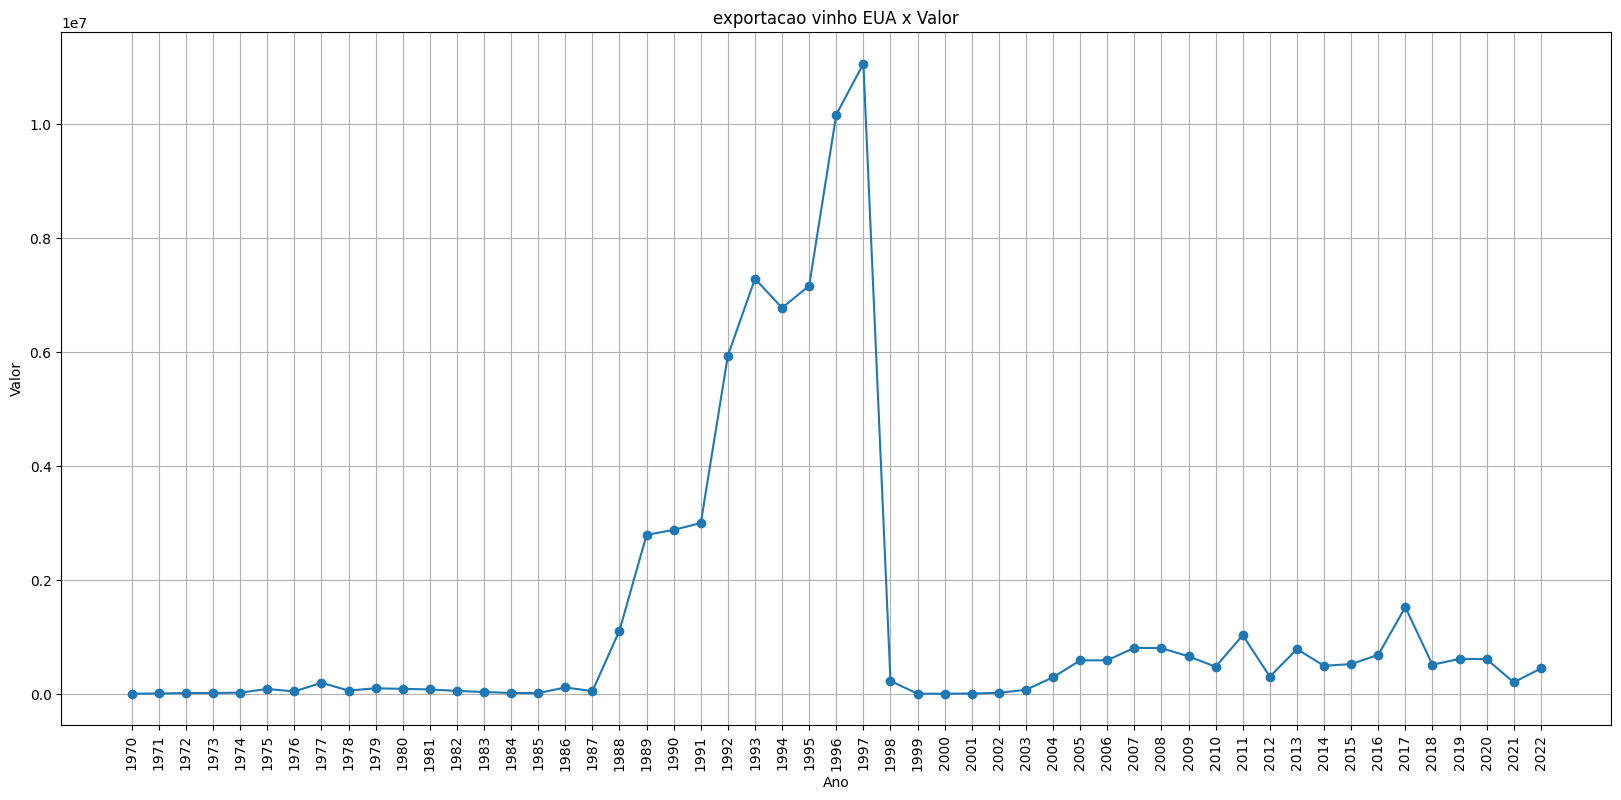

In [32]:
plt.figure(figsize=(20, 9))
plt.plot(df_usa_valor.index, df_usa_valor['Estados Unidos'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho EUA x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Rússia

In [37]:
df_rusia_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Rússia']]

In [38]:
df_rusia_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Rússia']]

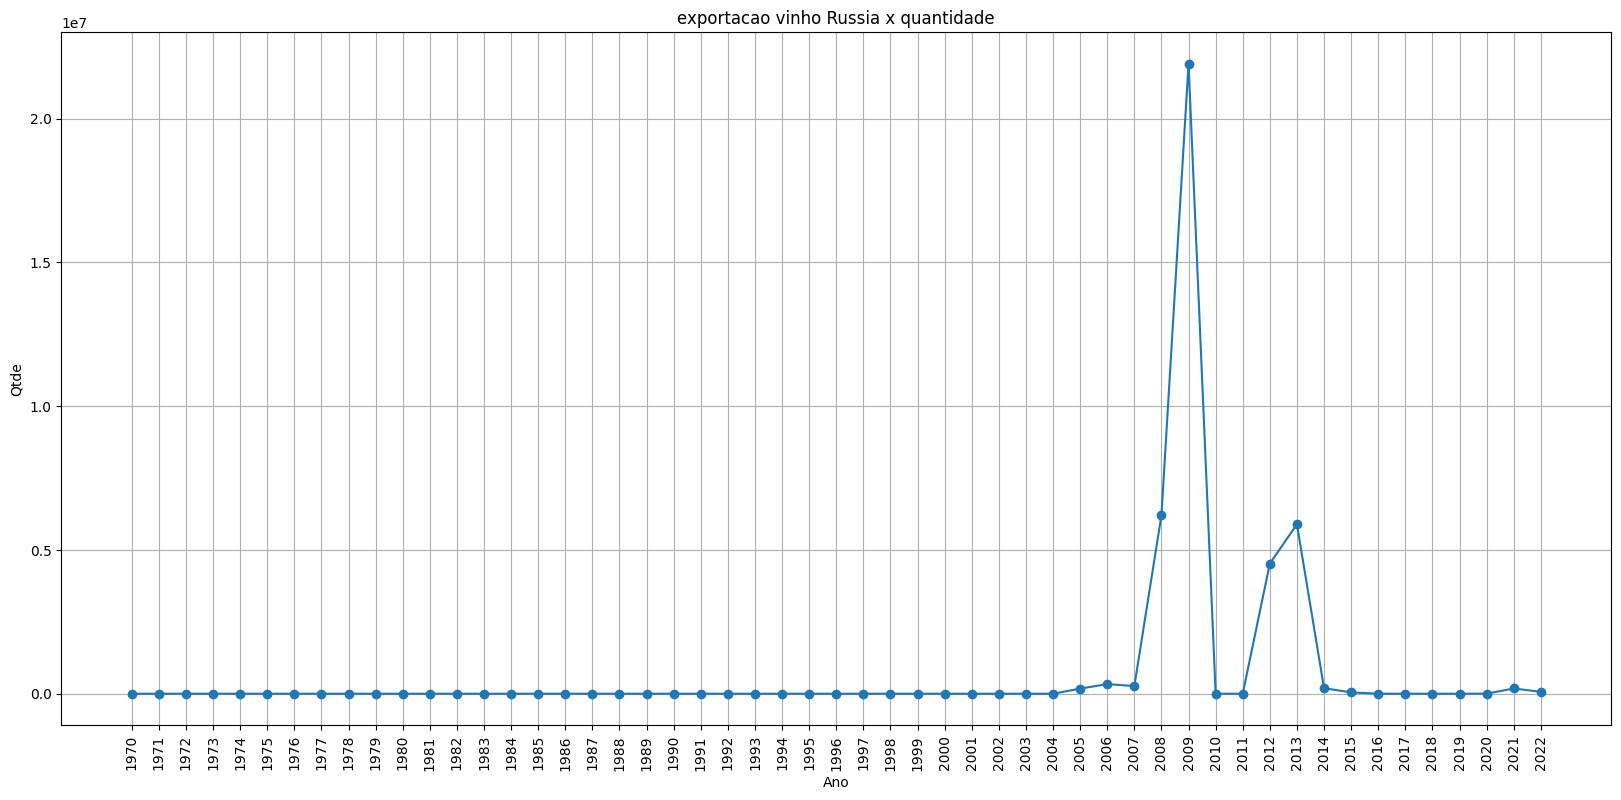

In [39]:
plt.figure(figsize=(20, 9))
plt.plot(df_rusia_qtd.index, df_rusia_qtd['Rússia'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Russia x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

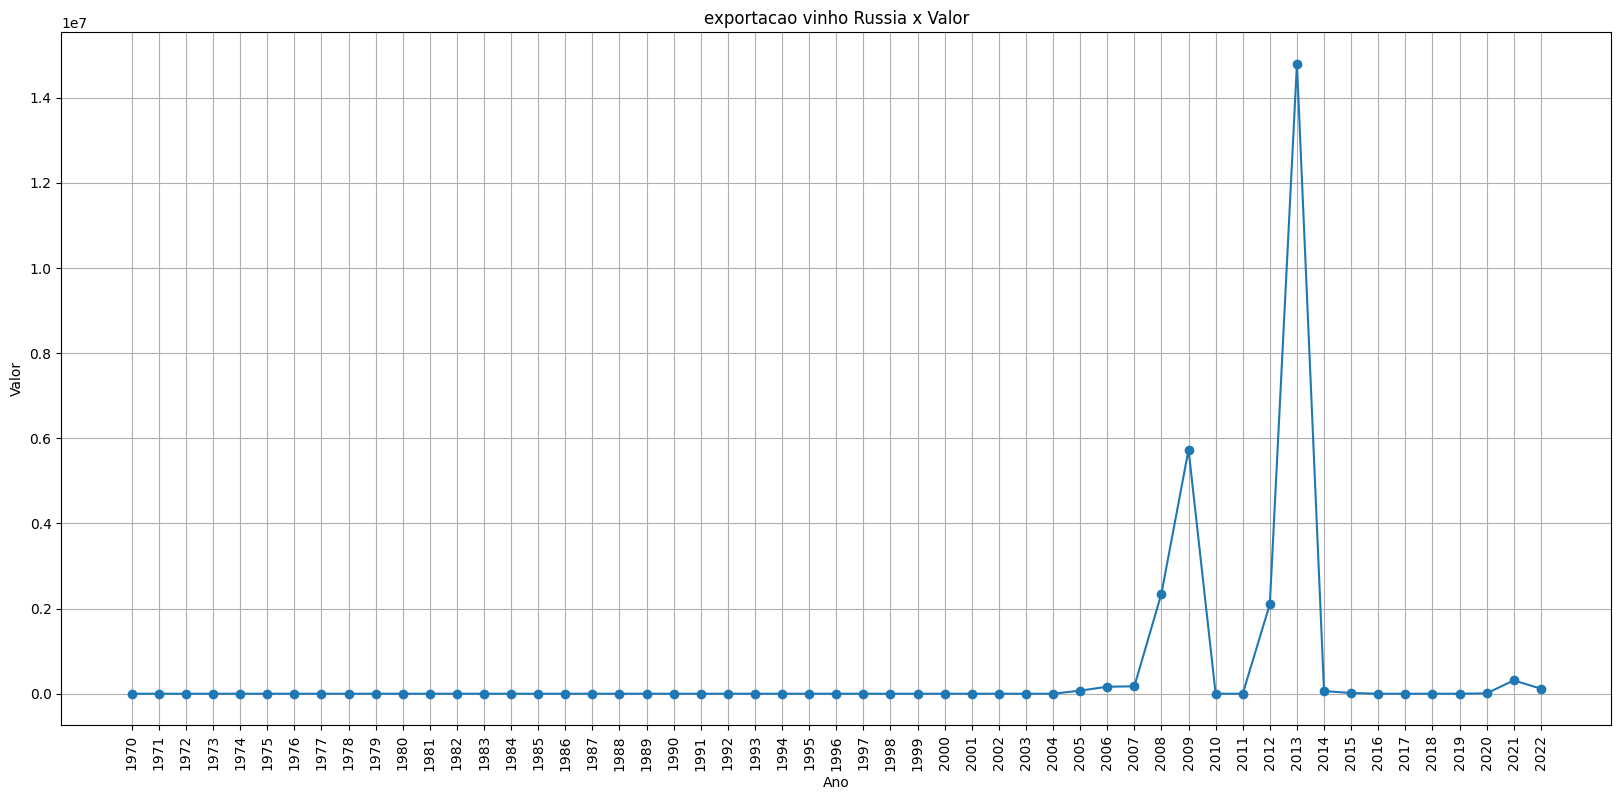

In [40]:
plt.figure(figsize=(20, 9))
plt.plot(df_rusia_valor.index, df_rusia_valor['Rússia'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Russia x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### Japão

In [41]:
df_jp_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['Japão']]

In [42]:
df_jp_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['Japão']]

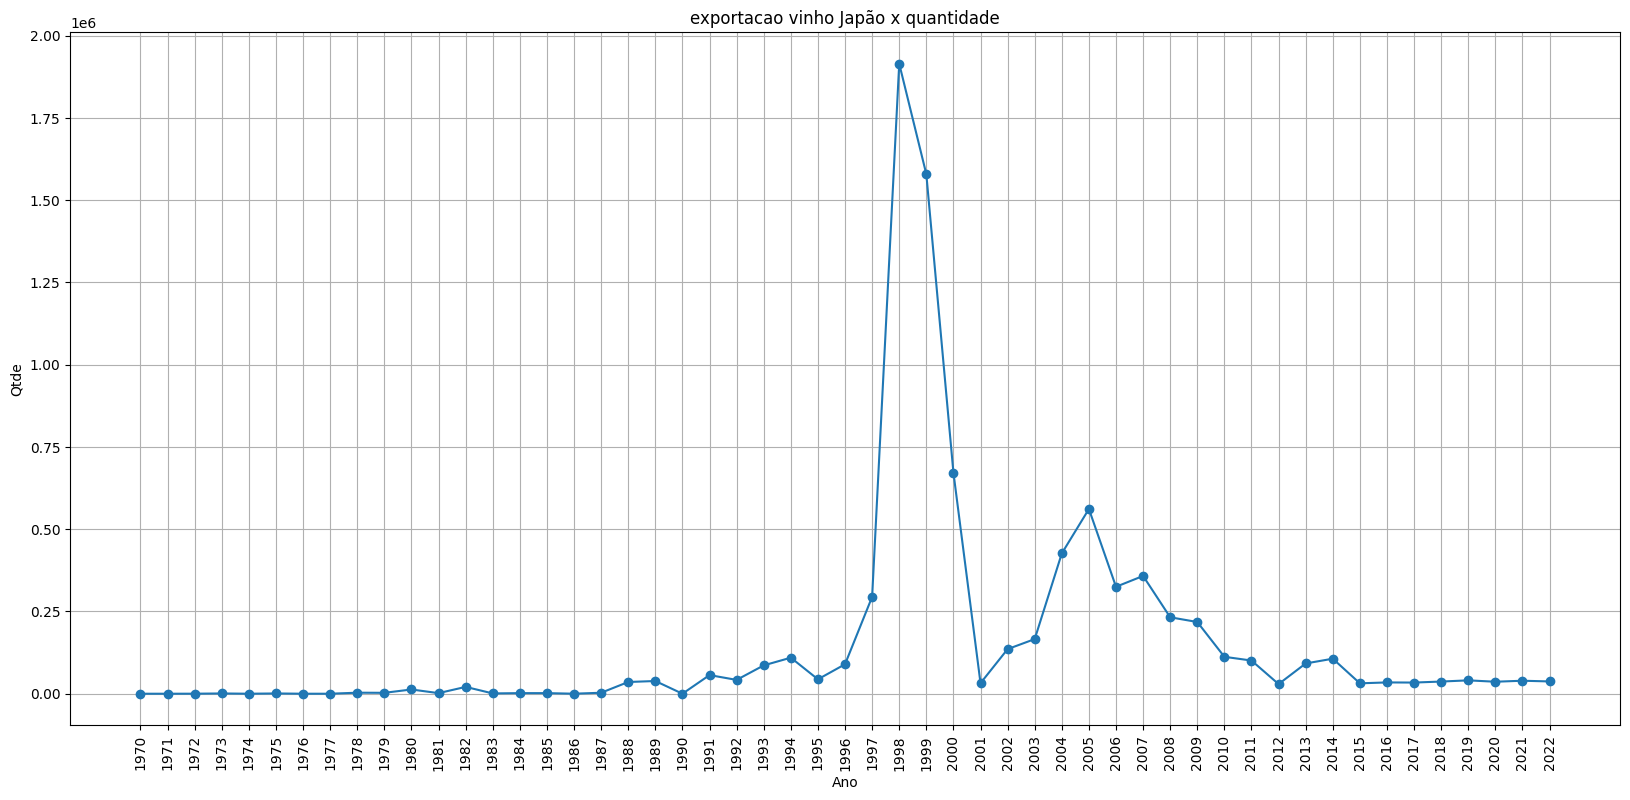

In [43]:
plt.figure(figsize=(20, 9))
plt.plot(df_jp_qtd.index, df_jp_qtd['Japão'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Japão x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

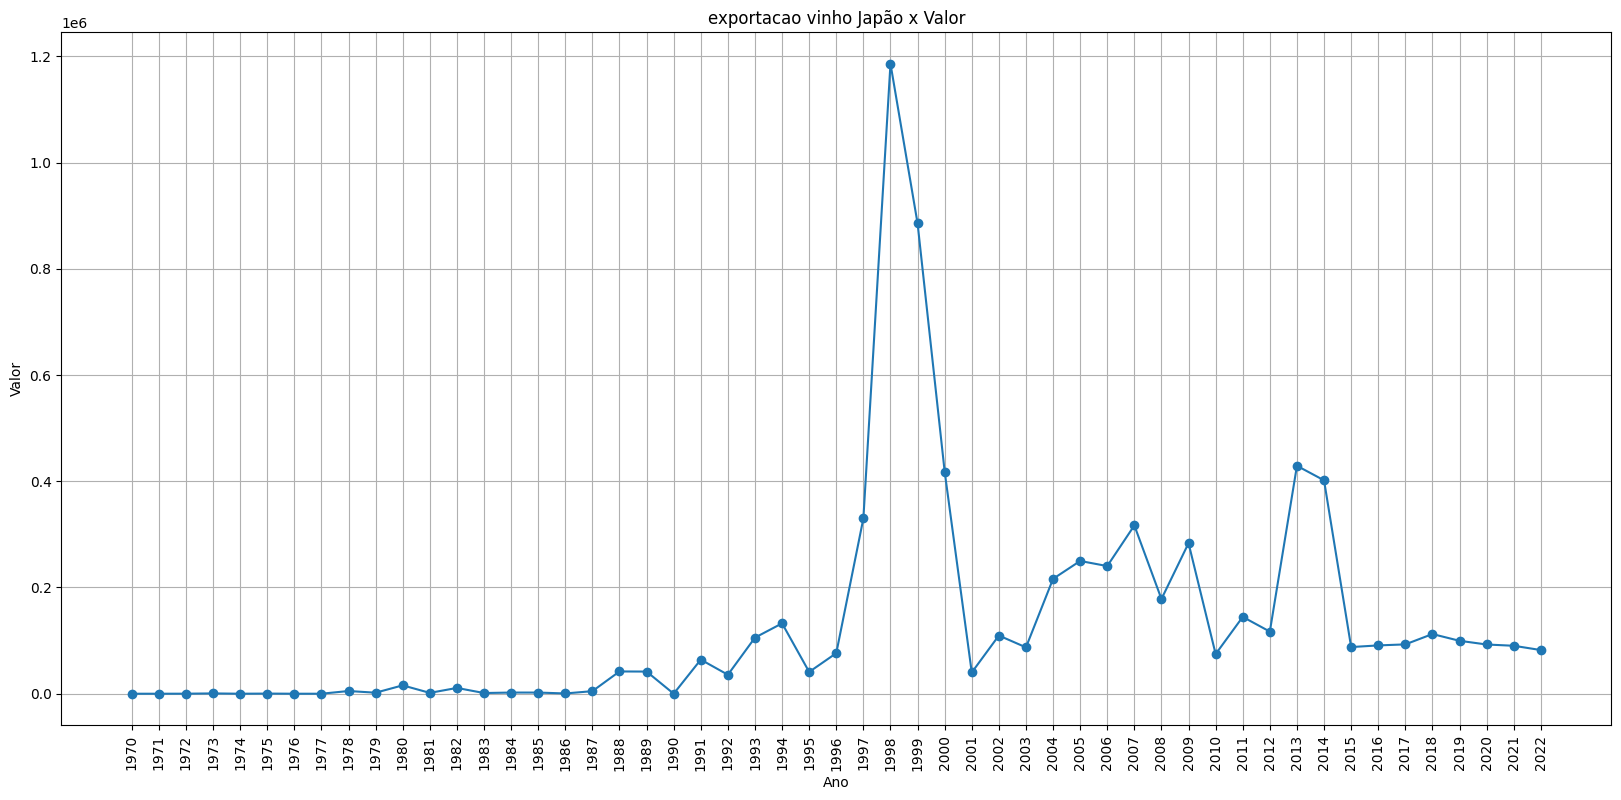

In [44]:
plt.figure(figsize=(20, 9))
plt.plot(df_jp_valor.index, df_jp_valor['Japão'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho Japão x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### China

In [45]:
df_china_qtd = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'quantidade'][['China']]

In [46]:
df_china_valor = df_exp_vinho_tab.loc[df_exp_vinho_tab['classe'] == 'valor'][['China']]

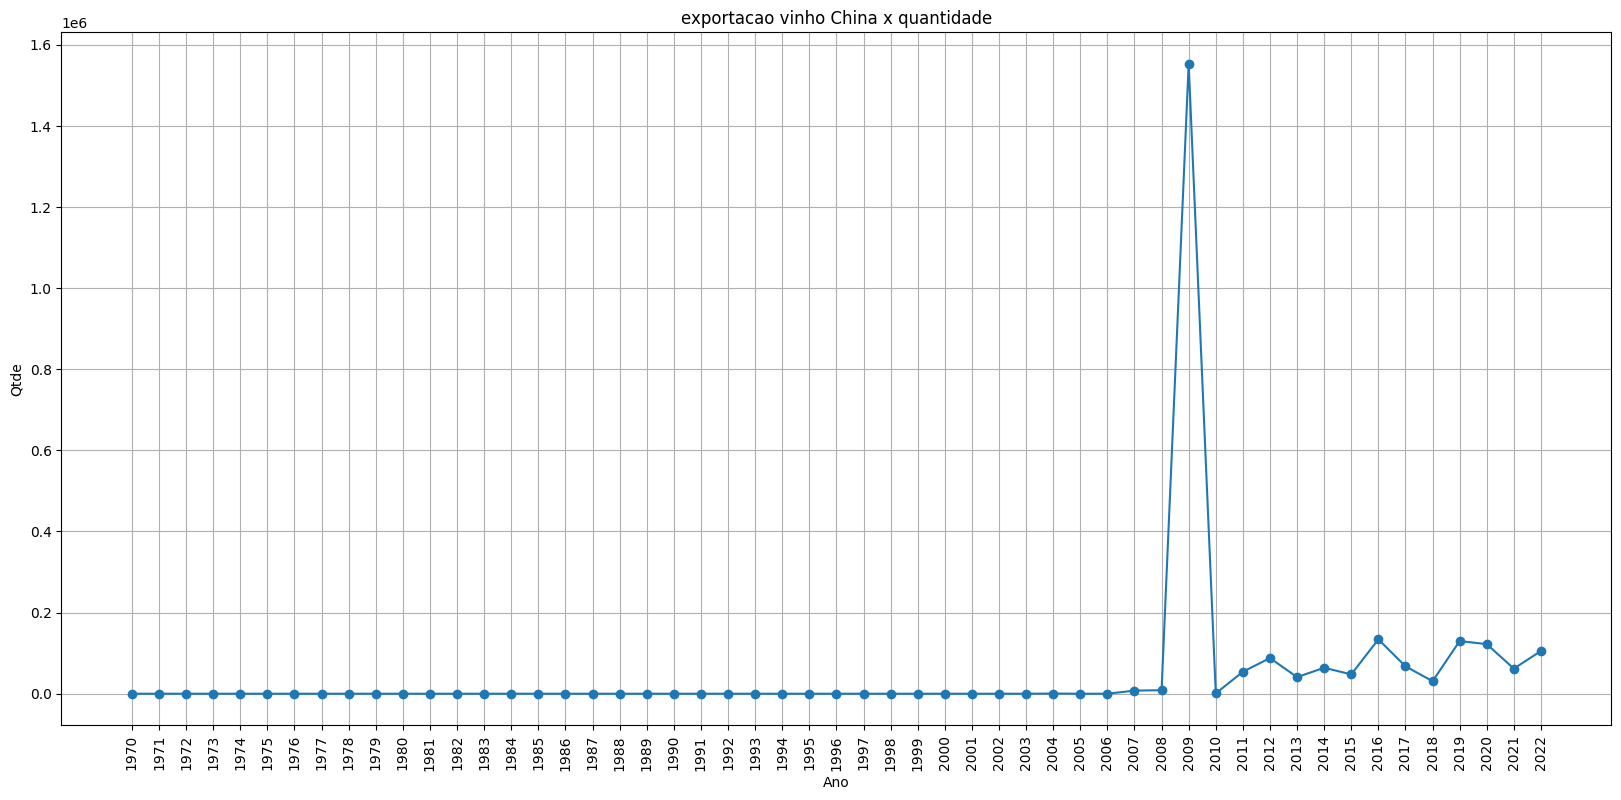

In [48]:
plt.figure(figsize=(20, 9))
plt.plot(df_china_qtd.index, df_china_qtd['China'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho China x quantidade')
plt.xlabel('Ano')
plt.ylabel('Qtde')
plt.show()

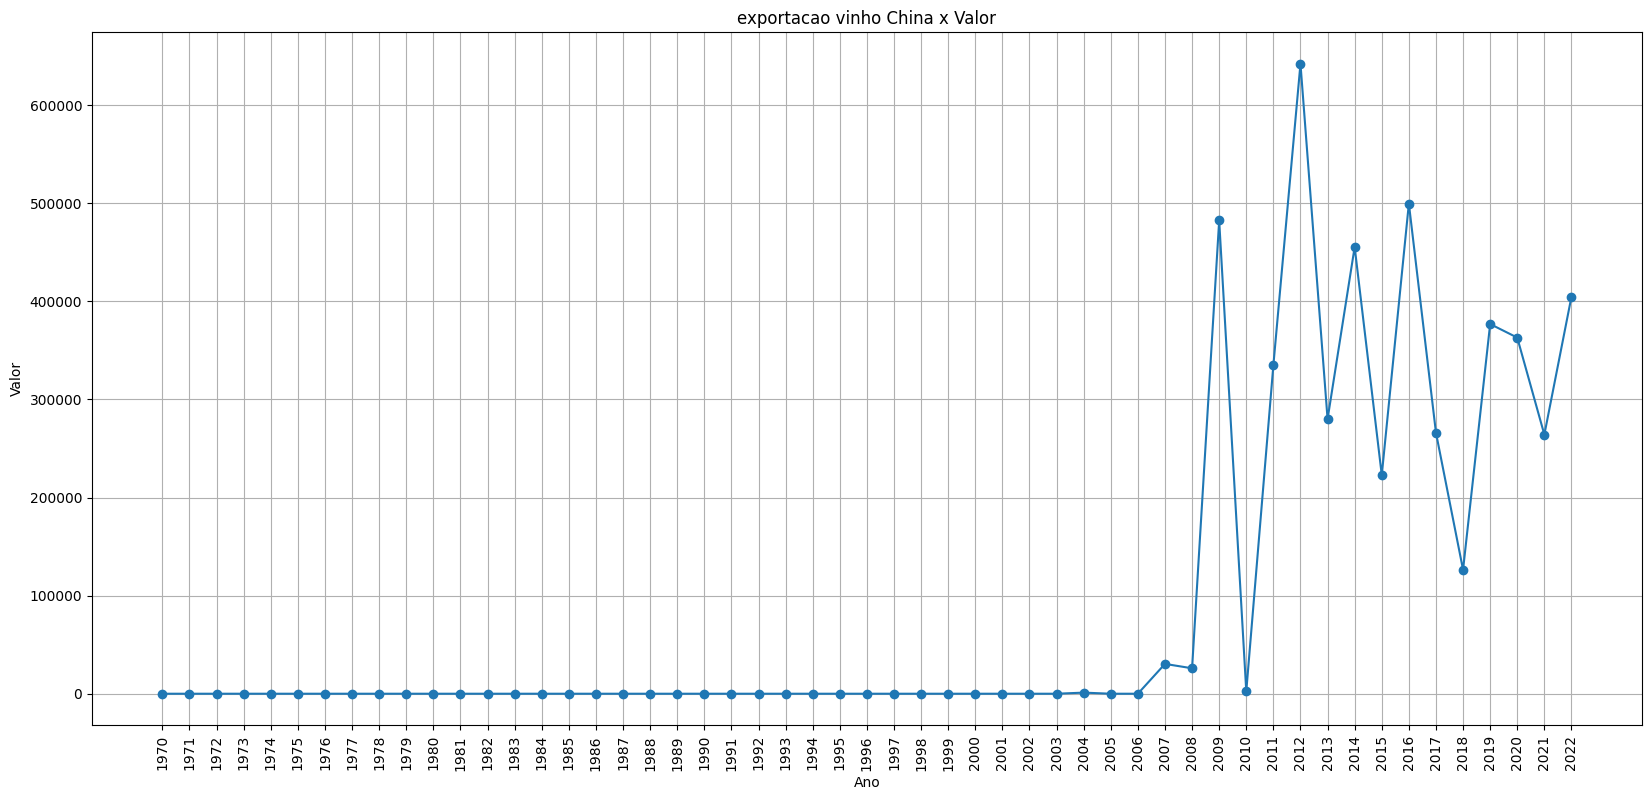

In [49]:
plt.figure(figsize=(20, 9))
plt.plot(df_china_valor.index, df_china_valor['China'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('exportacao vinho China x Valor')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.show()

#### VINHO ORGÂNICO

<function matplotlib.pyplot.show(close=None, block=None)>

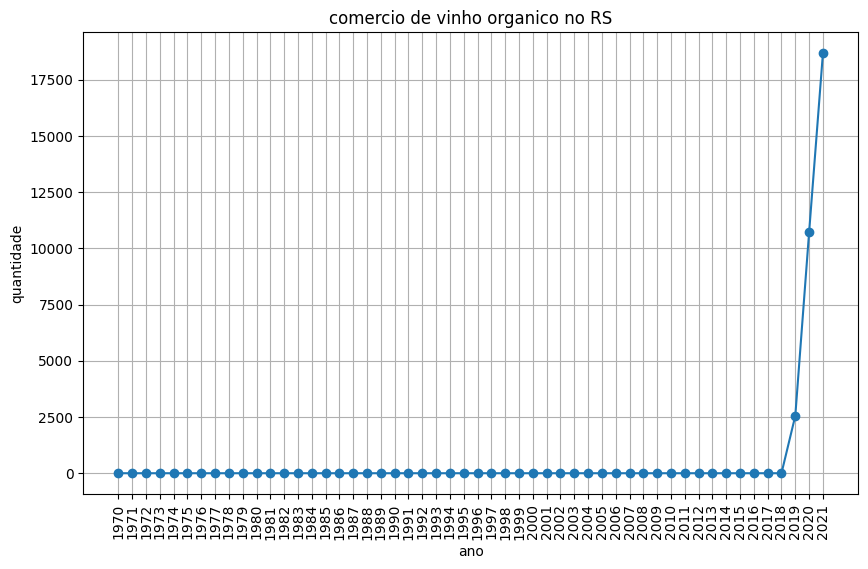

In [18]:
df_comercio_vinho_grafico_organico = df_comercio_vinho.transpose()
df_comercio_vinho_grafico_organico = df_comercio_vinho_grafico_organico.iloc[:, :15]

df_comercio_vinho_grafico_organico['Total Vinho'] = df_comercio_vinho_grafico_organico['VINHO ORGÂNICO']

plt.figure(figsize=(10, 6))
plt.plot(df_comercio_vinho_grafico_organico.index, df_comercio_vinho_grafico_organico['Total Vinho'], marker='o')
plt.xticks(rotation=90)
plt.grid(True)
plt.title('comercio de vinho organico no RS')
plt.xlabel('ano')
plt.ylabel('quantidade')
plt.show

<ipython-input-21-fa081e87c352>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
<ipython-input-21-fa081e87c352>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
<ipython-input-21-fa081e87c352>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

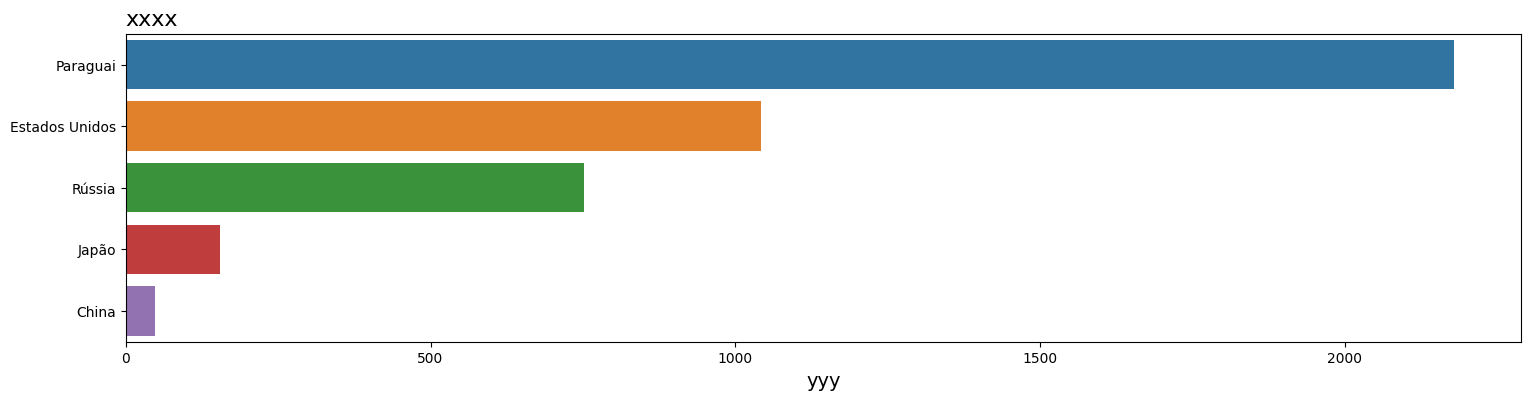

In [21]:
df_exp_vinho_final = df_exp_vinho.loc[df_exp_vinho['País'].isin(['Paraguai','Estados Unidos','Rússia','Japão','China'])]

df_exp_vinho_final['media'] = df_exp_vinho_final[['País','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
'1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
'2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',
'2020','2021','2022']].mean(axis=1)

df_exp_vinho_final2 = df_exp_vinho_final[['País','media']]
#df_exp_vinho_final2['media'] = df_exp_vinho_final2['media'].map('{:.2f}'.format)
df_exp_vinho_final2['media'] = df_exp_vinho_final2['media'].astype(int)/1000
df_exp_vinho_final2.set_index('País', inplace=True)
df_exp_vinho_final2 = df_exp_vinho_final2.sort_values(by='media', ascending=False)




fig, ax = plt.subplots(figsize=(18,4))
ax = sns.barplot(data=df_exp_vinho_final2, y=df_exp_vinho_final2.index, x='media', orient='h')

ax.set_title('xxxx', loc='left', fontsize=16)
ax.set_xlabel('yyy', fontsize=14)
ax.set_ylabel('')
plt.show()

#df_exp_vinho_final2.head()

In [20]:
df_exp_vinho_final2.head()

,media
País,
Paraguai,2180070
Estados Unidos,1042621
Rússia,751094
Japão,154696
China,47500


#### Importação


In [31]:
df_imp_vinhos

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,...,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116.0,2266827.0
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,...,142971,516975,101055,412794,136992,504168,106541,546967,92600.0,438595.0
2,3,Argélia,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,...,563,3249,0,0,0,0,2510,8761,0.0,0.0
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,...,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574.0,87519642.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,Ucrânia,0,0.0,0,0,0,0,0,0,...,0,0,4646,3074,0,0,0,0,0.0,0.0
62,63,Uruguai,5767,1871.0,1917,636,7394,2741,0,0,...,2836574,8467846,2778244,7938059,4079076,10146829,3788831,10063341,3394161.0,9867675.0
63,64,Não consta na tabela,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
64,65,Não declarados,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0


O Head de Dados pediu para que você construísse uma tabela contendo as seguintes informações:

- a. País de origem (Brasil).
- b. País de destino.
- c. Quantidade em litros de vinho exportado (utilize: 1KG = 1L).
- d. Valor em US$.

- [ ] prospecções futuras e possíveis ações para um melhoria nas exportações.
- [ ] Quantidade em litros de vinho exportado (utilize: 1KG = 1L).
- [ ] montante de venda de exportação no últimos 15 anos.